In [44]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.utils import resample
import missingno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
import math
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
%config InlineBackend.figure_format='retina'
COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(COLORS_PALETTE))
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

rcParams['figure.figsize'] = 22, 12

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [49]:
df_main = pd.read_csv(
    "PM2.5_dataset.csv",
    parse_dates=['stime'],
    index_col = "stime"
)

In [50]:
df = df_main

In [51]:
df_location = pd.read_csv("air_data_monitor_locations.csv")

In [29]:
df['wind_direction'] = 57.29578 * (np.arctan2(df.VGRD, df.UGRD)) + 180
df['wind_speed'] = np.sqrt(np.power(df.UGRD, 2)+ np.power(df.VGRD,2))

In [30]:
selected_cols = ['station_id','RH', 'UGRD', 'VGRD', 'HPBL', 'TMP', 'goes_measurement', 'wind_direction', 'wind_speed','air_data_value']
df = df[selected_cols]

In [31]:
df

,station_id,RH,UGRD,VGRD,HPBL,TMP,goes_measurement,wind_direction,wind_speed,air_data_value
stime,,,,,,,,,,
2019-01-02 20:00:00,06-011-0007,31.600000,-2.106623,-1.797583,256.61905,282.81880,-0.005922,40.474148,2.769325,17.0
2019-01-02 20:00:00,06-019-0500,62.200000,1.205877,1.764917,337.49405,281.63130,0.087090,235.657214,2.137539,13.0
2019-01-02 20:00:00,06-061-0003,61.500000,1.518377,1.014917,270.61905,280.13130,0.094333,213.759655,1.826343,21.0
2019-01-02 20:00:00,06-073-1201,15.400001,2.080877,-1.610083,1009.30660,288.19380,-0.024185,142.269022,2.631049,6.0
2019-01-02 20:00:00,06-079-2004,50.700000,2.393377,-1.172583,460.43155,285.19380,-0.014013,153.898472,2.665184,7.0
...,...,...,...,...,...,...,...,...,...,...
2019-10-30 23:00:00,49-035-4002,25.500000,0.723850,-2.034275,892.42080,273.49664,0.054725,109.586938,2.159221,6.3
2019-10-16 20:00:00,49-021-0005,8.100000,6.964932,4.869552,1664.20080,297.60638,0.010030,214.959432,8.498400,6.4
2019-10-16 20:00:00,49-035-4002,8.900001,2.214932,4.682052,842.38837,297.60638,0.282129,244.682641,5.179530,8.5


In [32]:
df2 = df

In [33]:
df_location

,station_id,station_lat,station_lon,states,forest_perc,pop,pop_density,num_vehicles,COPD_Heart
0,06-019-0500,36.985119,-119.658339,California,32.71,39512223.0,657.080463,15065827.0,16914.0
1,06-029-0018,35.642943,-117.715066,California,32.71,39512223.0,657.080463,15065827.0,16914.0
2,06-061-0003,38.935680,-121.099590,California,32.71,39512223.0,657.080463,15065827.0,16914.0
3,06-065-0010,33.747236,-115.820124,California,32.71,39512223.0,657.080463,15065827.0,16914.0
4,06-073-1201,33.362593,-117.090230,California,32.71,39512223.0,657.080463,15065827.0,16914.0
5,06-079-2004,35.020830,-120.563880,California,32.71,39512223.0,657.080463,15065827.0,16914.0
6,06-079-2007,35.046730,-120.587770,California,32.71,39512223.0,657.080463,15065827.0,16914.0
7,06-083-2004,34.637820,-120.457500,California,32.71,39512223.0,657.080463,15065827.0,16914.0
8,08-029-0007,38.876400,-107.602300,Colorado,34.42,5758736.0,144.003444,1798177.0,13440.0
9,08-045-0019,39.438060,-108.026110,Colorado,34.42,5758736.0,144.003444,1798177.0,13440.0


In [34]:
df2['lat'] = df2['station_id'].map(df_location.set_index('station_id')['station_lat'])
df2['lon'] = df2['station_id'].map(df_location.set_index('station_id')['station_lon'])
print (df2)

                      station_id         RH  ...        lat         lon
stime                                        ...                       
2019-01-02 20:00:00  06-011-0007  31.600000  ...        NaN         NaN
2019-01-02 20:00:00  06-019-0500  62.200000  ...  36.985119 -119.658339
2019-01-02 20:00:00  06-061-0003  61.500000  ...  38.935680 -121.099590
2019-01-02 20:00:00  06-073-1201  15.400001  ...  33.362593 -117.090230
2019-01-02 20:00:00  06-079-2004  50.700000  ...  35.020830 -120.563880
...                          ...        ...  ...        ...         ...
2019-10-30 23:00:00  49-035-4002  25.500000  ...  40.662878 -111.901188
2019-10-16 20:00:00  49-021-0005   8.100000  ...  37.747430 -113.055525
2019-10-16 20:00:00  49-035-4002   8.900001  ...  40.662878 -111.901188
2019-10-16 21:00:00  49-035-4002   8.300000  ...  40.662878 -111.901188
2019-10-18 18:00:00  49-021-0005  44.100002  ...  37.747430 -113.055525

[31570 rows x 12 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df2['forest_perc'] = df2['station_id'].map(df_location.set_index('station_id')['forest_perc'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2['pop'] = df2['station_id'].map(df_location.set_index('station_id')['pop'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df2['pop_density'] = df2['station_id'].map(df_location.set_index('station_id')['pop_density'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df2['num_vehicles'] = df2['station_id'].map(df_location.set_index('station_id')['num_vehicles'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df2['num_vehicles'] = df2['station_id'].map(df_location.set_index('station_id')['num_vehicles'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2['copd_heart'] = df2['station_id'].map(df_location.set_index('station_id')['COPD_Heart'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
selected_cols = ['station_id','lat','lon','RH', 'UGRD', 'VGRD', 'HPBL', 'TMP', 'goes_measurement', 'wind_direction', 'wind_speed','forest_perc','pop','pop_density','num_vehicles','copd_heart','air_data_value']
df = df[selected_cols]

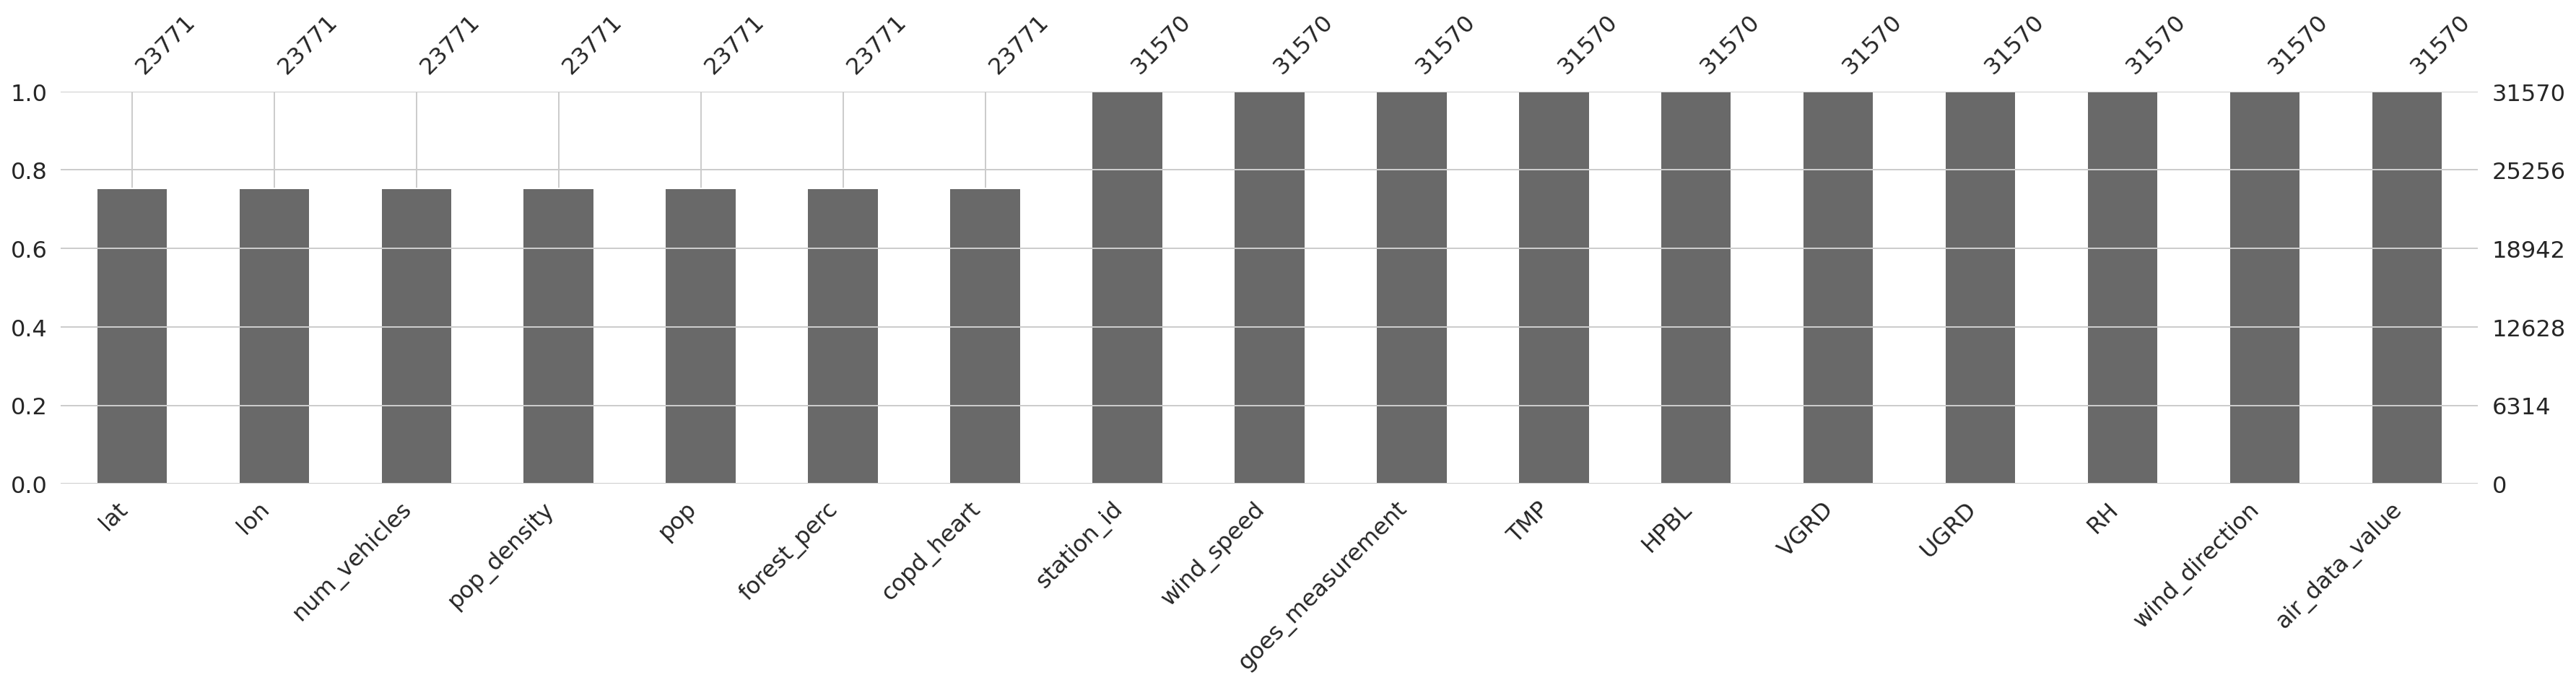

In [42]:
import missingno
missingno.bar(df, sort='ascending', figsize = (30,5))

In [43]:
df.to_csv('air_data_master.csv')